# Overview

This notebook loads the dataset from csv file, reviews the features, and does some cleanup such as removing rare feature labels etc.

Then it plots some visualization to look at some of the samples, class distribution for different features etc.

Note that some of the code implemented here is encapsulated as utility functions and put under respective modules under `my_utils` folder. This allows to reuse them in later experiments in training notebooks, keeping the code rather clean.

In [ ]:
%load_ext autoreload
%autoreload 2

RANDOM_STATE = 2025

In [1]:
import pandas as pd

# Load CSV File

csv_file = "../data/cloth_dataset/aarong_dataset_clean_final.csv"
df = pd.read_csv(csv_file)

In [2]:
df.sample(5)

,product_id,annotated_image_name,fabric_types_clean,wear_types_clean,colors_clean,textures_clean,value_additions_clean
2998,6343,1190000009956_1.jpg,Viscose Blend,Kurta,"purple,white","embroidery,printed",NaN
319,2204,0550000141742_2.jpg,Muslin,Saree,"orange,yellow,pink,white","embroidery,nakshi,printed",nakshi
2143,7935,0460000029386.jpg,Cotton,Nightwear,"pink,white","embroidery,printed",NaN
2580,7801,0460000029962.jpg___full.png,Linen,Nightwear,"brown,blue,green","embroidery,printed",NaN
1766,3266,0410000101477.jpg,Viscose,Maternity,"grey,brown,red","embroidery,printed",NaN


Let's put the multi-class and multi-label features into two two separate lists

In [3]:
single_label_features = ['fabric_types_clean', 'wear_types_clean']
multilabel_features = ['colors_clean', 'textures_clean', 'value_additions_clean']

Let's replace the NaN values in the DataFrame with empty strings.

In [4]:
for column in single_label_features + multilabel_features:
	df[column] = df[column].fillna('')

df.sample(5)

,product_id,annotated_image_name,fabric_types_clean,wear_types_clean,colors_clean,textures_clean,value_additions_clean
1738,7616,0470000103691.jpg___full.png,Silk,Scarves,"red,green",hand paint,
1557,7634,0410000105210.jpg___full.png,Silk,Scarves,"red,brown,purple,blue",hand paint,
1315,7836,0460000030252.jpg,Voile,Nightwear,"brown,yellow,white",embroidery,lace
1157,226,0560000073589_2.jpg,Cotton,Saree,"orange,pink,green",nakshi,nakshi
2263,2369,1420000168914_3.jpg,Viscose Blend,Shalwar Kameez,"red,brown,green","embroidery,printed,striped",handloom


Now let's have a look at the distribution of the labels for all the features

In [5]:
from my_utils.dataset_utils import get_label_distribution
from IPython.display import display

for col_name in single_label_features + multilabel_features:
	display(get_label_distribution(df[col_name]))

,count
Cotton,1069
Viscose,627
Viscose Blend,597
Silk,553
Voile,233
Muslin,150
Linen,59
Synthetic,6
Blended Fabric,4
Poplin,3


,count
Shalwar Kameez,856
Saree,795
Panjabi,437
Scarves,269
Nightwear,266
Kurta,224
Maternity,172
Shawls,121
Tops,70
Skirts,43


,count
white,1093
green,1007
blue,944
red,841
brown,772
pink,759
black,734
yellow,539
golden,524
orange,520


,count
embroidery,1596
printed,1443
block print,501
textured,309
screen print,282
tie dye,252
,239
hand paint,226
dobby,108
applique,106


,count
,2428
handloom,189
tassels,147
fringe,119
lace,107
applique,106
sequins,89
tangail,82
nakshi,74
baluchari,40


Some clases have very few representative samples. Let's remove those labels from the dataset.

I have implemented two utility functions- `get_rare_labels`- that returns a list of labels that have sample count below given threshold, and `remove_labels` - which removes the provided list of labels from the given dataframe column.

Looking at the distributions above, I decided to remove any label that has less than 50 samples.

In [6]:
from my_utils.dataset_utils import remove_labels, get_rare_labels

min_samples_threshold = 50

# Removing labels that exist in < threshold samples from sample labels, using same threshold for all features
for col_name in single_label_features + multilabel_features:
	print(f"\nProcessing {col_name}...")

	rare_labels = get_rare_labels(df[col_name], min_samples_threshold)

	#rare_labels.add('')

	if len(rare_labels) < 1:
		print(f"No rare labels in {col_name}.")
		display(get_label_distribution(df[col_name]))
		continue

	print(f"Rare labels in {col_name} are {rare_labels}. Removing them from the dataset.")
	df[col_name] = df[col_name].apply(lambda x: remove_labels(x, rare_labels))

	display(get_label_distribution(df[col_name]))

df.sample(5)


Processing fabric_types_clean...
Rare labels in fabric_types_clean are {'Synthetic', 'Blended Fabric', 'Poplin'}. Removing them from the dataset.


,count
Cotton,1069
Viscose,627
Viscose Blend,597
Silk,553
Voile,233
Muslin,150
Linen,59
,13



Processing wear_types_clean...
Rare labels in wear_types_clean are {'Coats & Jackets', 'Skirts', 'Fabric (Metres)'}. Removing them from the dataset.


,count
Shalwar Kameez,856
Saree,795
Panjabi,437
Scarves,269
Nightwear,266
Kurta,224
Maternity,172
Shawls,121
,91
Tops,70



Processing colors_clean...
No rare labels in colors_clean.


,count
white,1093
green,1007
blue,944
red,841
brown,772
pink,759
black,734
yellow,539
golden,524
orange,520



Processing textures_clean...
Rare labels in textures_clean are {'Screen Print', 'buti', 'painted', 'Machine Embroidery', 'Hand Embroidery', 'mauve', 'batik print', 'opera', 'Block Print', 'dot', 'Floral', 'Printed'}. Removing them from the dataset.


,count
embroidery,1596
printed,1443
block print,501
,365
textured,309
screen print,282
tie dye,252
hand paint,226
dobby,108
applique,106



Processing value_additions_clean...
Rare labels in value_additions_clean are {'Screen Print', 'baluchari', 'Hand Embroidery', 'mirror work', 'Block Print', 'Printed', 'stone work'}. Removing them from the dataset.


,count
,2491
handloom,189
tassels,147
fringe,119
lace,107
applique,106
sequins,89
tangail,82
nakshi,74


,product_id,annotated_image_name,fabric_types_clean,wear_types_clean,colors_clean,textures_clean,value_additions_clean
2315,2688,1420000176971_1.jpg,Viscose Blend,Shalwar Kameez,grey,"embroidery,floral,printed",
2284,6453,1190000010324.jpg,Cotton,Kurta,"purple,white","tie dye,embroidery,printed",
3291,6927,0570000125487_1.jpg,Viscose Blend,Panjabi,red,block print,
3092,7738,0470000103351.jpg,Silk,Scarves,"black,yellow,white",hand paint,
3178,7754,0470000103063.jpg___full.png,Silk,Scarves,"yellow,blue,white",hand paint,


So this is the final set of samples that will be used for training and testing the model.

Now let's visualize this data using some plots.

I will start by looking into some random sample images, and their feature labels.

In [7]:
# show 16 sample images in 4x4 grid

import matplotlib.pyplot as plt

import numpy as np
import os
import cv2
import random
from PIL import Image

image_dir = "../data/cloth_dataset/images"

samples = df.sample(16, random_state=RANDOM_STATE)

# Plot
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

for i, (_, row) in enumerate(samples.iterrows()):
	image_path = os.path.join(image_dir, row['annotated_image_name'])
	image = Image.open(image_path)

	axes[i].imshow(image)
	axes[i].axis('off')

	axes[i].set_title(f"Fabric: {row['fabric_types_clean']}\nWear: {row['wear_types_clean']}\nColor: {row['colors_clean']}\nTexture: {row['textures_clean']}\nValue Additions: {row['value_additions_clean']}\n-----------------", loc='center', y=-0.5)

plt.tight_layout()
plt.show()

NameError: name 'RANDOM_STATE' is not defined

Now, lets look at the distribution of the labels for each feature. I will use a bar plot to visualize this.

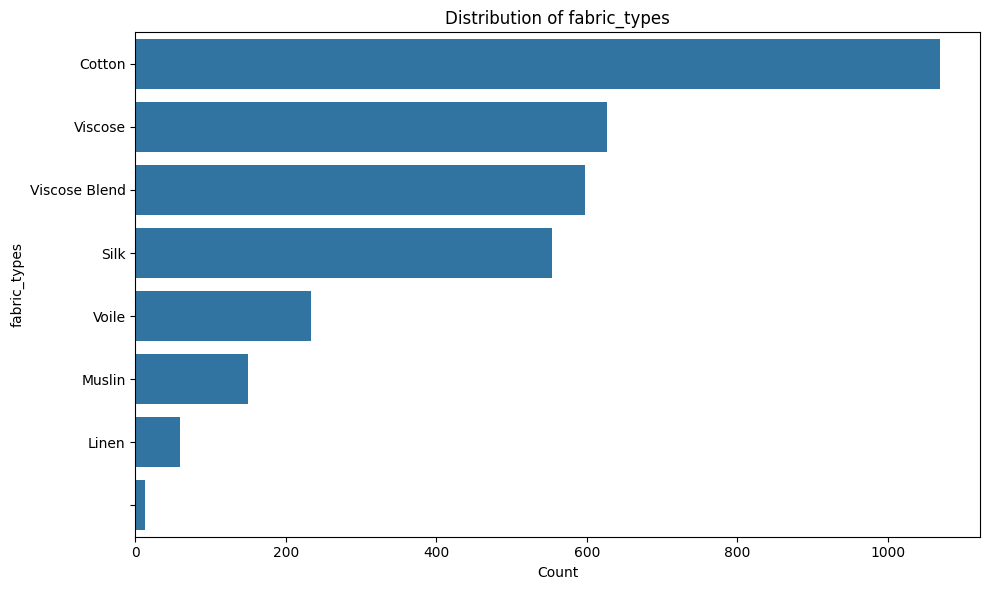

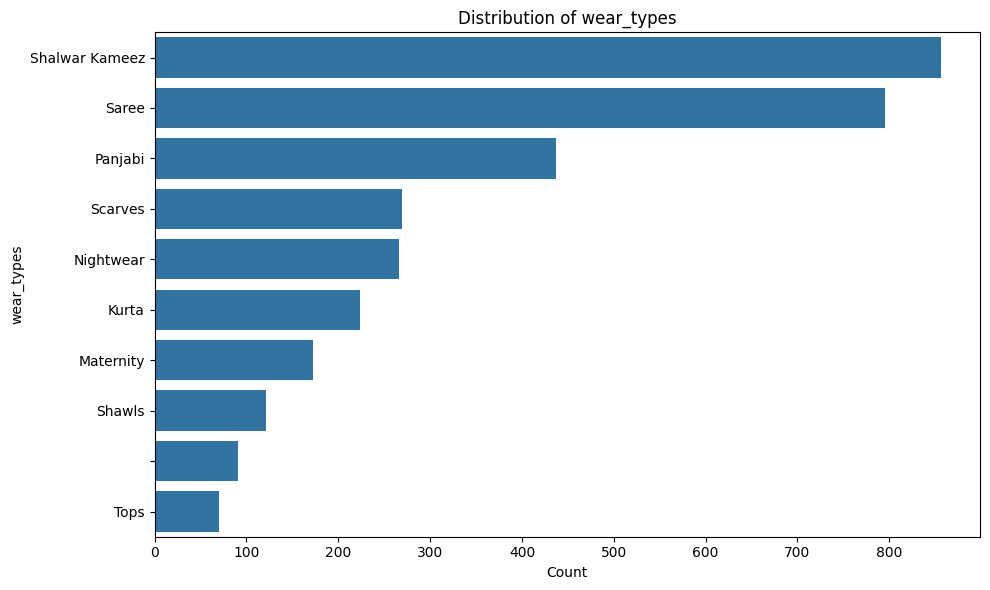

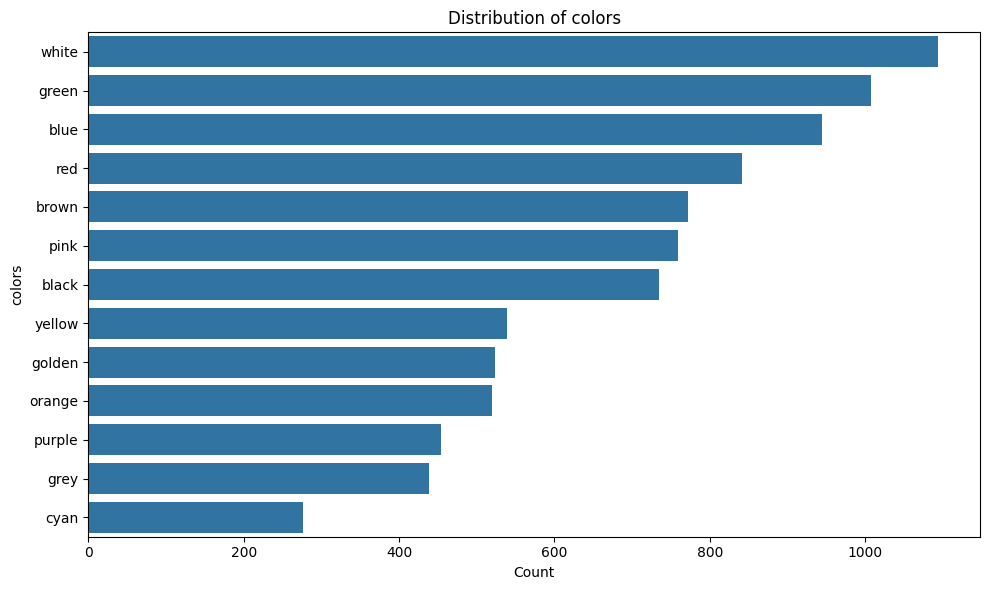

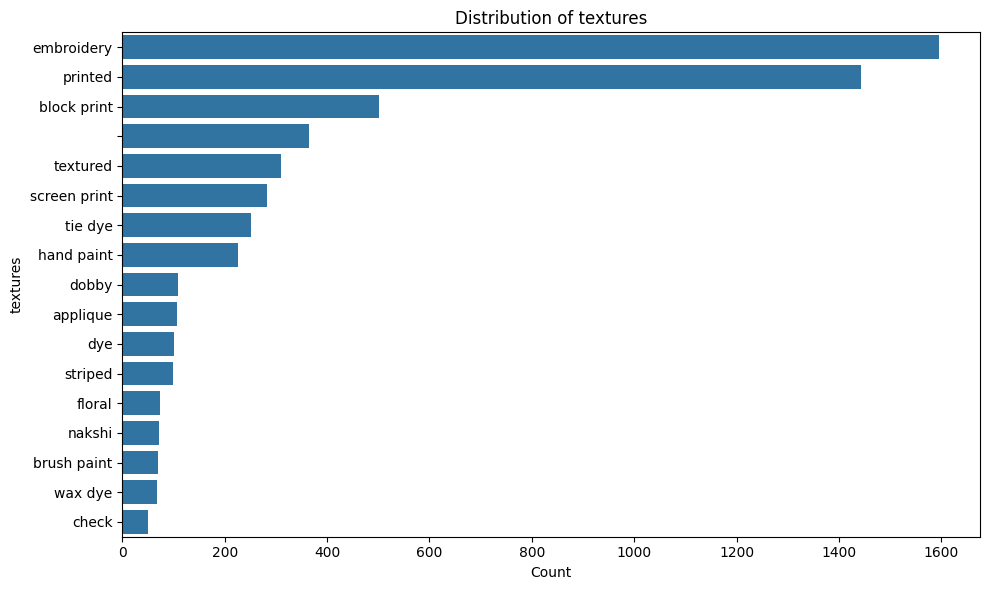

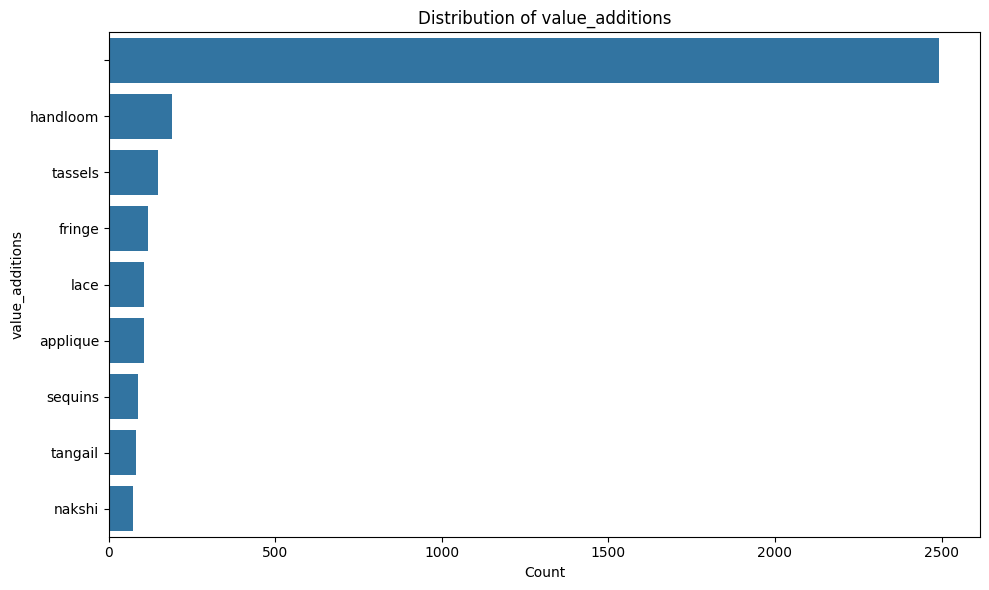

In [8]:
# Show distribution of the features in 3x2 grid

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from my_utils.dataset_utils import get_label_distribution


def plot_label_distribution(df, col_name):
	fig, ax = plt.subplots(figsize=(10, 6))

	# returns a dataframe of labels and their counts
	label_counts = get_label_distribution(df[col_name])

	# Create a bar plot
	sns.barplot(x=label_counts['count'], y=label_counts.index, ax=ax)

	ax.set_title(f"Distribution of {col_name.replace('_clean', '')}")
	ax.set_xlabel("Count")
	ax.set_ylabel(col_name.replace('_clean', ''))

	plt.tight_layout()
	plt.show()

for col_name in single_label_features:
	plot_label_distribution(df, col_name)

for col_name in multilabel_features:
	plot_label_distribution(df, col_name)


There seem to be two problems with the distribution of labels.

First, the Value Addition feature is highly imbalanced, with most of the samples having empty labels. This may affect the model to be biased towards the empty label, and not learn to predict the other labels properly.

Second, the Texture feature also has long tail, couple of labels have high number of samples compared to others.

During training, I will utilize class weight to balance the impact of the imbalanced classes.